In [5]:
!pip install yfinance


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.7 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.5 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.4 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.4 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.3 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.2 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.1 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.1 MB/s eta 0:00:01
     --

# Question 1: Extracting Tesla Stock Data Using yfinance

In [6]:
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Display the first 5 rows
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


# Question 2: Extracting Tesla Revenue Data Using Webscraping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# Find the revenue table
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

# Remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


# Question 3: Extracting GameStop Stock Data Using yfinance

In [8]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
print(gamestop_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


# Question 4: Extracting GameStop Revenue Data Using Webscraping

In [9]:
# Reuse the same URL structure (replace with actual GameStop URL if different)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
print(gamestop_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


# Question 5: Tesla Stock and Revenue Dashboard

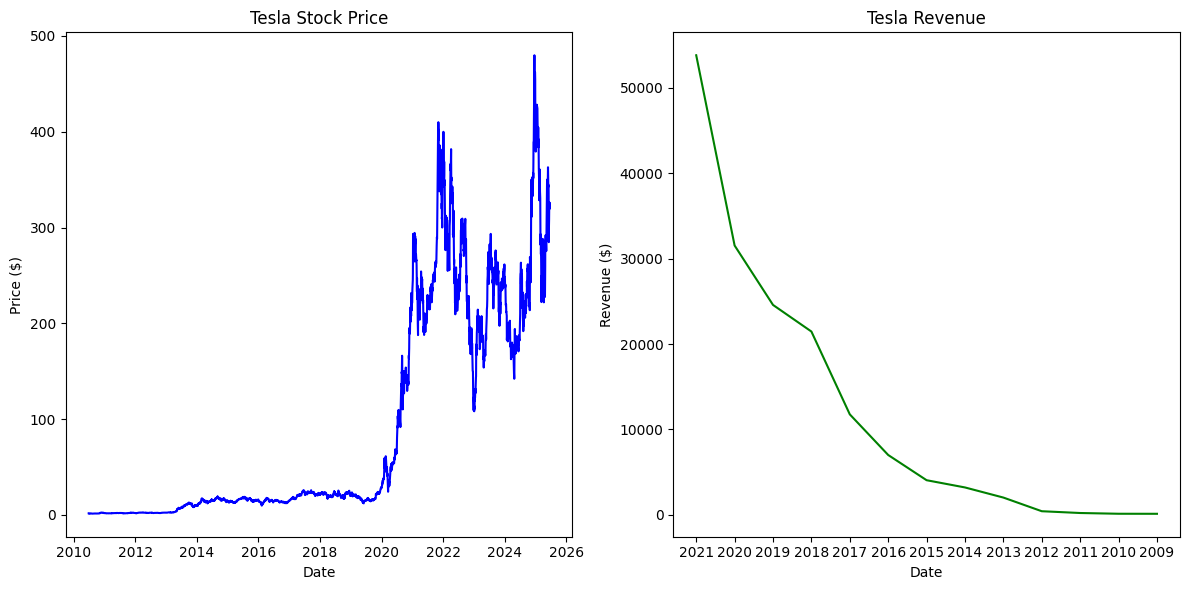

In [10]:
import matplotlib.pyplot as plt

# Plot Tesla Stock Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tesla_data.index, tesla_data["Close"], color='blue')
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# Plot Tesla Revenue
plt.subplot(1, 2, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"].astype(float), color='green')
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

# Question 6: GameStop Stock and Revenue Dashboard

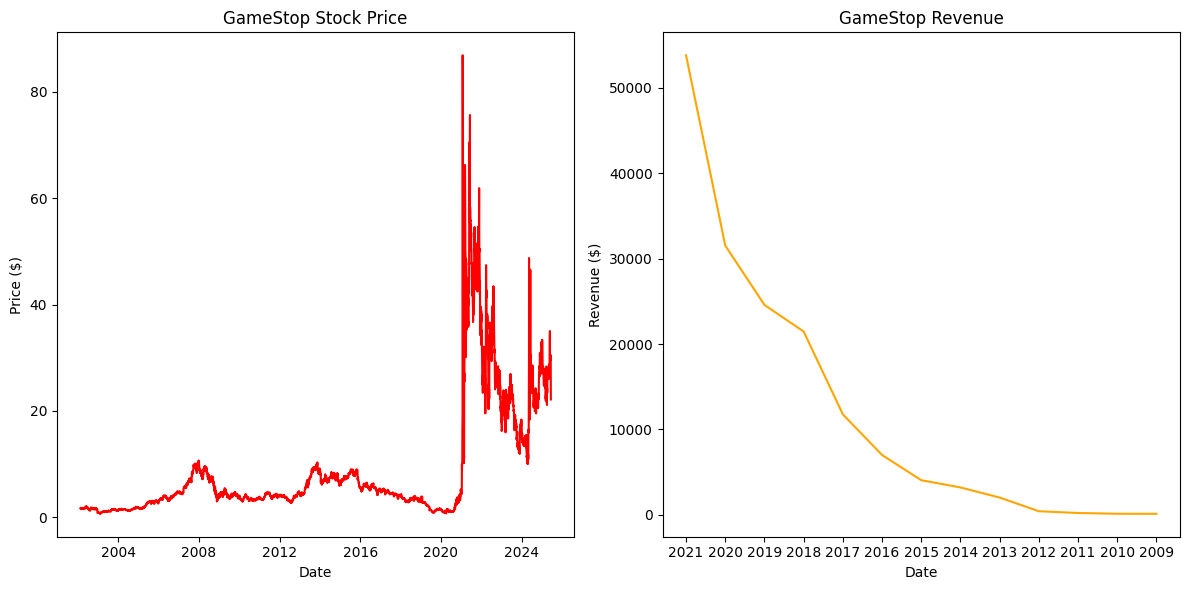

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(gamestop_data.index, gamestop_data["Close"], color='red')
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")

plt.subplot(1, 2, 2)
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"].astype(float), color='orange')
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()